In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("komplett_data_med_utfylte_mengder.csv", parse_dates=["datetime"])


print(df.head())

print(df.isnull().sum())



             datetime      MW
0 2011-01-01 00:00:00  3416.0
1 2011-01-01 00:15:00  4755.0
2 2011-01-01 00:30:00  4939.0
3 2011-01-01 00:45:00  4939.0
4 2011-01-01 01:00:00  4998.0
datetime    0
MW          0
dtype: int64


In [7]:
gjennomsnitt = df['MW'].mean()
median = df['MW'].median()
std = df['MW'].std()

print(f"Gjennomsnitt: {gjennomsnitt}")
print(f"Median: {median}")
print(f"Standaravvik: {std}")


Gjennomsnitt: 3183.3550126825876
Median: 2164.0
Standaravvik: 3045.758909199866


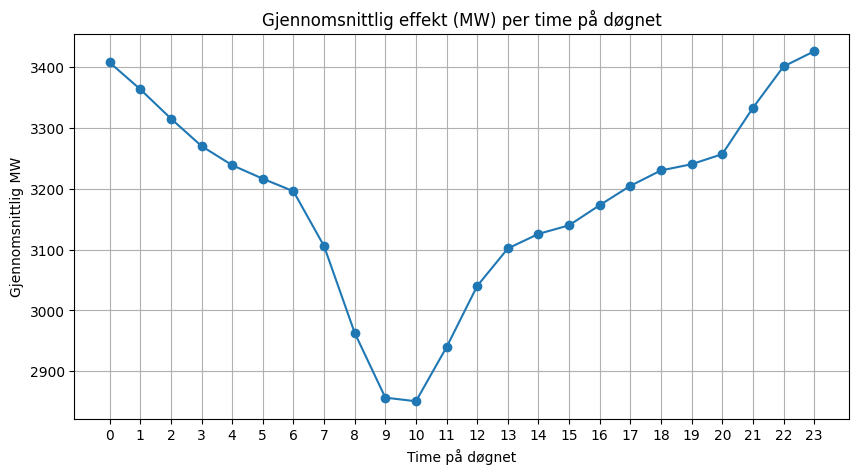

In [8]:

#Eksempel på gjennomsnitt per time per dag for de 10 årene

# tidspunkt på døgnet (time)
df["hour"] = df["datetime"].dt.hour

# Beregner gjennomsnittlig MW for hver time i døgnet
hourly_avg = df.groupby("hour")["MW"].mean()

plt.figure(figsize=(10, 5))
plt.plot(hourly_avg.index, hourly_avg.values, marker='o')
plt.title("Gjennomsnittlig effekt (MW) per time på døgnet")
plt.xlabel("Time på døgnet")
plt.ylabel("Gjennomsnittlig MW")
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()


/var/folders/8f/nwn4bqq56715k1k5jg6vggg00000gn/T/ipykernel_19588/3616673179.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dag["hour"] = dag["datetime"].dt.hour


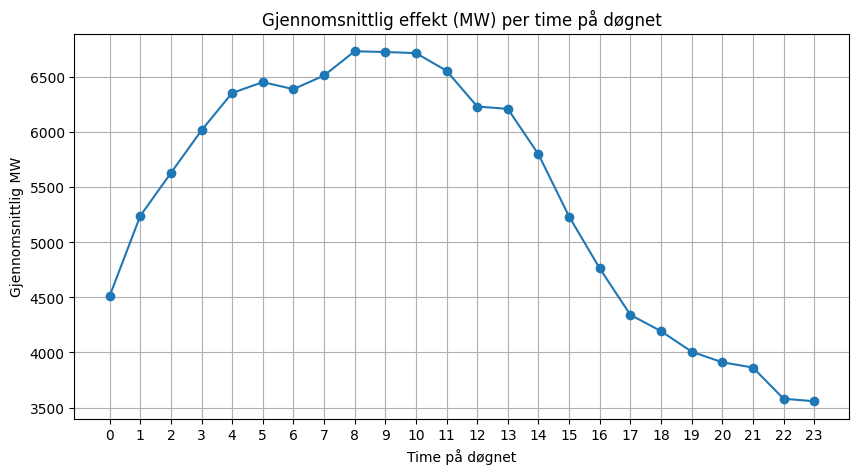

In [9]:
# Filtrer for én spesifikk dag, f.eks. 2011-01-01
dag = df[df["datetime"].dt.date == pd.to_datetime("2011-01-01").date()]

# Ekstraher time og grupper på det
dag["hour"] = dag["datetime"].dt.hour
hourly_avg_dag = dag.groupby("hour")["MW"].mean()

plt.figure(figsize=(10, 5))
plt.plot(hourly_avg_dag.index, hourly_avg_dag.values, marker='o')
plt.title("Gjennomsnittlig effekt (MW) per time på døgnet")
plt.xlabel("Time på døgnet")
plt.ylabel("Gjennomsnittlig MW")
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()